In [18]:
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

In [19]:
cnn = Sequential()
Lalpha=0.25
cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha), input_shape = (32,32,3)))
cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))

cnn.add(Flatten())
cnn.add(Dense(256, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 256)        

In [20]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

num = int(round(len(X_train)*0.99))

train_image = X_train[:num].reshape(-1,32,32,3)
train_image = train_image.astype('float32') / 255 - 0.5

valid_image = X_train[num:].reshape(-1,32,32,3)
valid_image = valid_image.astype('float32') / 255 - 0.5

test_image = X_test.reshape(-1,32,32,3)
test_image = test_image.astype('float32') / 255 - 0.5

train_label = to_categorical(Y_train[:num])
valid_label = to_categorical(Y_train[num:])
test_label  = to_categorical(Y_test)

print(len(valid_image))
print("mo")

500
mo


In [21]:
history = cnn.fit(train_image, train_label, epochs=20, batch_size = 2048, validation_data =(valid_image, valid_label), shuffle = 'True')

Epoch 1/20
25/25 [==============================] - 6s 250ms/step - loss: 2.2451 - accuracy: 0.1685 - val_loss: 2.2156 - val_accuracy: 0.1800
Epoch 2/20
25/25 [==============================] - 6s 244ms/step - loss: 1.9179 - accuracy: 0.2693 - val_loss: 1.8533 - val_accuracy: 0.2980
Epoch 3/20
25/25 [==============================] - 6s 245ms/step - loss: 1.6830 - accuracy: 0.3589 - val_loss: 1.6170 - val_accuracy: 0.3980
Epoch 4/20
25/25 [==============================] - 6s 247ms/step - loss: 1.4951 - accuracy: 0.4357 - val_loss: 1.4800 - val_accuracy: 0.4460
Epoch 5/20
25/25 [==============================] - 6s 247ms/step - loss: 1.3657 - accuracy: 0.4956 - val_loss: 1.3362 - val_accuracy: 0.5080
Epoch 6/20
25/25 [==============================] - 6s 245ms/step - loss: 1.3404 - accuracy: 0.5133 - val_loss: 1.1998 - val_accuracy: 0.5680
Epoch 7/20
25/25 [==============================] - 6s 247ms/step - loss: 1.1609 - accuracy: 0.5779 - val_loss: 1.0827 - val_accuracy: 0.6080
Epoch 

In [22]:
test_loss, test_acc = cnn.evaluate(test_image, test_label)
print('test_acc: {acc}'.format(acc=test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
test_acc: 0.10000000149011612


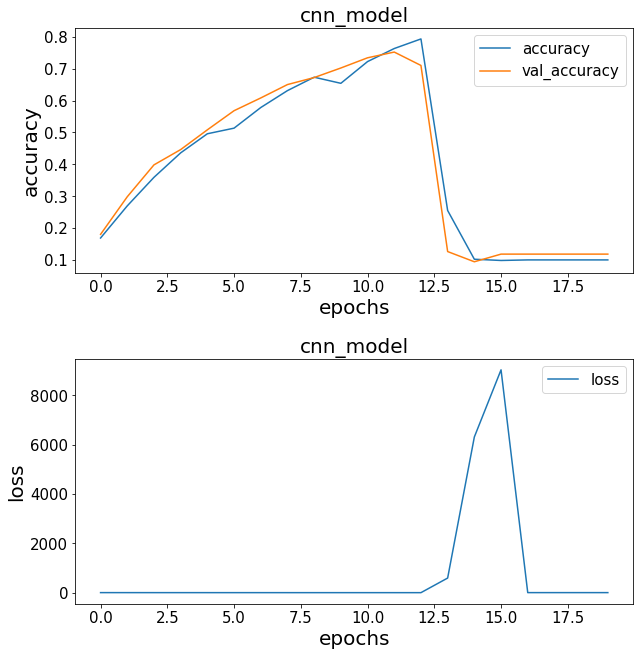

In [23]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
#
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("cnn_model", fontsize=20)
plt.xlabel("epochs", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.legend(['accuracy', 'val_accuracy'], fontsize=15)
#
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title("cnn_model", fontsize=20)
plt.xlabel("epochs", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.legend(['loss'], fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

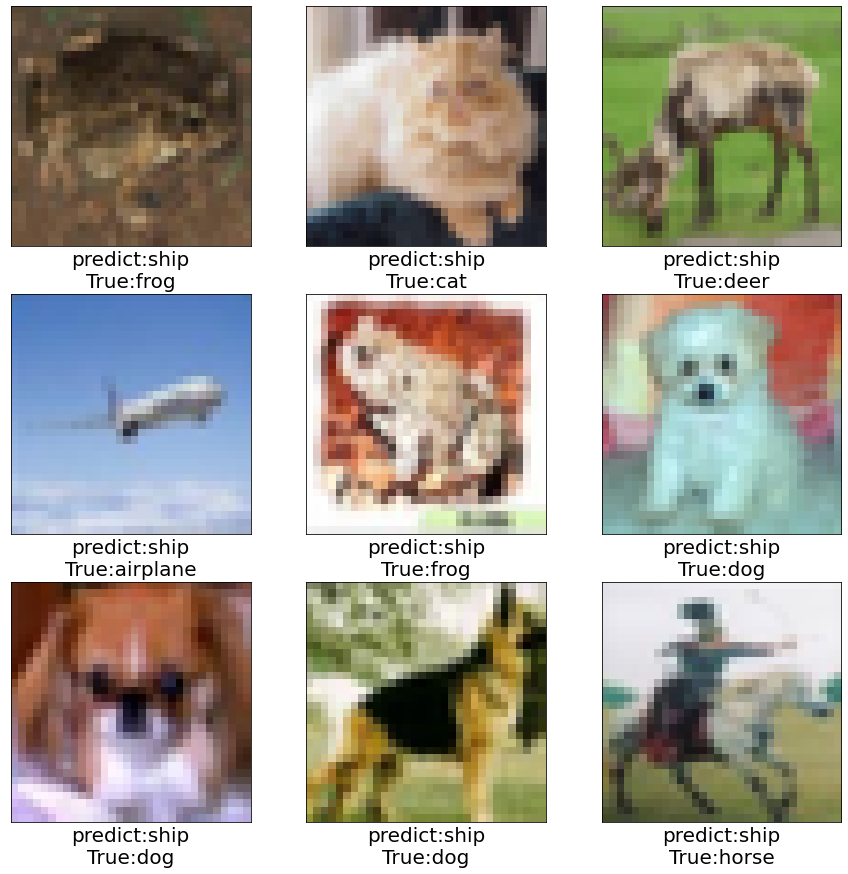

In [24]:
predict_test = cnn.predict(test_image)
prediction = np.argmax(predict_test, axis=1)
index = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    n = random.randint(0,10000)
    pred = index[prediction[n]]
    GroundTruth = index[int(np.array(Y_test)[n])]
    plt.imshow(X_test[n], cmap= plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('predict:{a}\nTrue:{b}'.format(a=pred,b=GroundTruth ), fontsize=20)
plt.show()